**Note**: Click on "*Kernel*" > "*Restart Kernel and Run All*" in [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) *after* finishing the exercises to ensure that your solution runs top to bottom *without* any errors. If you cannot run this file on your machine, you may want to open it [in the cloud <img height="12" style="display: inline-block" src="../static/link/to_mb.png">](https://mybinder.org/v2/gh/webartifex/intro-to-python/develop?urlpath=lab/tree/04_iteration/01_exercises.ipynb).

# Chapter 4: Recursion & Looping (Coding Exercises)

The exercises below assume that you have read the [first part <img height="12" style="display: inline-block" src="../static/link/to_nb.png">](https://nbviewer.jupyter.org/github/webartifex/intro-to-python/blob/develop/04_iteration/00_content.ipynb) of Chapter 4.

The `...`'s in the code cells indicate where you need to fill in code snippets. The number of `...`'s within a code cell give you a rough idea of how many lines of code are needed to solve the task. You should not need to create any additional code cells for your final solution. However, you may want to use temporary code cells to try out some ideas.

## Towers of Hanoi

A popular example of a problem that is solved by recursion art the **[Towers of Hanoi <img height="12" style="display: inline-block" src="../static/link/to_wiki.png">](https://en.wikipedia.org/wiki/Tower_of_Hanoi)**.

In its basic version, a tower consisting of, for example, four disks with increasing radii, is placed on the left-most of **three** adjacent spots. In the following, we refer to the number of disks as $n$, so here $n = 4$.

The task is to move the entire tower to the right-most spot whereby **two rules** must be obeyed:

1. Disks can only be moved individually, and
2. a disk with a larger radius must *never* be placed on a disk with a smaller one.

Although the **[Towers of Hanoi <img height="12" style="display: inline-block" src="../static/link/to_wiki.png">](https://en.wikipedia.org/wiki/Tower_of_Hanoi)** are a **classic** example, introduced by the mathematician [Édouard Lucas <img height="12" style="display: inline-block" src="../static/link/to_wiki.png">](https://en.wikipedia.org/wiki/%C3%89douard_Lucas) already in 1883, it is still **actively** researched as this scholarly [article](https://www.worldscientific.com/doi/abs/10.1142/S1793830919300017?journalCode=dmaa&) published in January 2019 shows.

Despite being so easy to formulate, the game is quite hard to solve.

Below is an interactive illustration of the solution with the minimal number of moves for $n = 4$.

<img src="static/towers_of_hanoi.gif" width="60%" align="left">

Watch the following video by [MIT](https://www.mit.edu/)'s professor [Richard Larson](https://idss.mit.edu/staff/richard-larson/) for a comprehensive introduction.

The [MIT Blossoms Initiative](https://blossoms.mit.edu/) is primarily aimed at high school students and does not have any prerequisites.

The video consists of three segments, the last of which is *not* necessary to have watched to solve the tasks below. So, watch the video until 37:55.

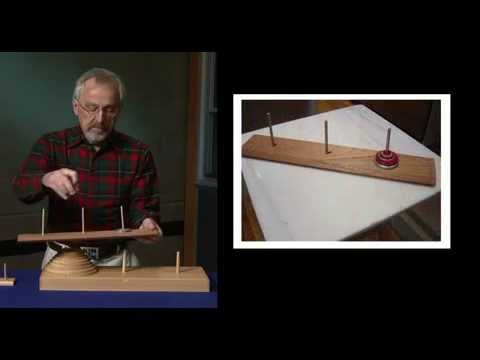

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("UuIneNBbscc", width="60%")

### Video Review Questions

**Q1**: Explain for the $n = 3$ case why it can be solved as a **recursion**!

 < your answer >

**Q2**: How does the number of minimal moves needed to solve a problem with three spots and $n$ disks grow as a function of $n$? How does this relate to the answer to **Q1**?

 < your answer >

**Q3**: The **[Towers of Hanoi <img height="12" style="display: inline-block" src="../static/link/to_wiki.png">](https://en.wikipedia.org/wiki/Tower_of_Hanoi)** problem is of **exponential growth**. What does that mean? What does that imply for large $n$?

 < your answer >

**Q4**: The video introduces the recursive relationship $Sol(4, 1, 3) = Sol(3, 1, 2) ~ \bigoplus ~ Sol(1, 1, 3) ~ \bigoplus ~ Sol(3, 2, 3)$. The $\bigoplus$ is to be interpreted as some sort of "plus" operation. How does this "plus" operation work? How does this way of expressing the problem relate to the answer to **Q1**?

 < your answer >

### Naive Translation to Python

As most likely the first couple of tries will result in *semantic* errors, it is advisable to have some sort of **visualization tool** for the program's output: For example, an online version of the game can be found [here](https://www.mathsisfun.com/games/towerofhanoi.html).

Let's first **generalize** the mathematical relationship from above and then introduce the variable names used in our `sol()` implementation below.

Unsurprisingly, the recursive relationship in the video may be generalized into:

$Sol(n, o, d) = Sol(n-1, o, i) ~ \bigoplus ~ Sol(1, o, d) ~ \bigoplus ~ Sol(n-1, i, d)$

$Sol(\cdot)$ takes three "arguments" $n$, $o$, and $d$ and is defined with *three* references to itself that take modified versions of $n$, $o$, and $d$ in different orders. The middle reference, Sol(1, o, d), constitutes the "end" of the recursive definition: It is the problem of solving Towers of Hanoi for a "tower" of only one disk.

While the first "argument" of $Sol(\cdot)$ is a number that we refer to as `n_disks` below, the second and third "arguments" are merely **labels** for the spots, and we refer to the **roles** they take in a given problem as `origin` and `destination` below. Instead of labeling individual spots with the numbers `1`, `2`, and `3` as in the video, we may also call them `"left"`, `"center"`, and `"right"`. Both ways are equally correct! So, only the first "argument" of $Sol(\cdot)$ is really a number!

As an example, the notation $Sol(4, 1, 3)$ from above can then be "translated" into Python as either the function call `sol(4, 1, 3)` or `sol(4, "left", "right")`. This describes the problem of moving a tower consisting of `n_disks=4` disks from either the `origin=1` spot to the `destination=3` spot or from the `origin="left"` spot to the `destination="right"` spot.

To adhere to the rules, an `intermediate` spot $i$ is needed. In `sol()` below, this is a temporary variable within a function call and *not* a parameter of the function itself.

In summary, to move a tower consisting of `n_disks` (= $n$) disks from an `origin` (= $o$) to a `destination` (= $d$), three steps must be executed:

1. Move the tower's topmost `n_disks - 1` (= $n - 1$) disks from the `origin` (= $o$) to an `intermediate` (= $i$) spot (= **Sub-Problem 1**),
2. move the remaining and largest disk from the `origin` (= $o$) to the `destination` (= $d$), and
3. move the `n_disks - 1` (= $n - 1$) disks from the `intermediate` (= $i$) spot to the `destination` (= $d$) spot (= **Sub-Problem 2**).

The two sub-problems themselves are solved via the same *recursive* logic.

Write your answers to **Q5** to **Q7** into the skeleton of `sol()` below.

`sol()` takes three arguments `n_disks`, `origin`, and `destination` that mirror $n$, $o$, and $d$ above.

For now, assume that all arguments to `sol()` are `int` objects! We generalize this into real labels further below in the `hanoi()` function.

Once completed, `sol()` should *print* out all the moves in the correct order. For example, *print* `"1 -> 3"` to mean "Move the top-most `n_disks - 1` disks from spot `1` to spot `3`."

In [2]:
def sol(n_disks, origin, destination):
    """A naive implementation of Towers of Hanoi.

    This function prints out the moves to solve a Towers of Hanoi problem.

    Args:
        n_disks (int): number of disks in the tower
        origin (int): spot of the tower at the start; 1, 2, or 3
        destination (int): spot of the tower at the end; 1, 2, or 3
    """
    # answer to Q5
    if n_disks <= 0:
        return

    # answer to Q6
    if origin == 1 and destination == 2:
        intermediate = 3
    elif origin == 1 and destination == 3:
        intermediate = 2
    elif origin == 2 and destination == 1:
        intermediate = 3
    elif origin == 2 and destination == 3:
        intermediate = 1
    elif origin == 3 and destination == 1:
        intermediate = 2
    else:  # origin == 3 and destination == 2
        intermediate = 1

    # answer to Q7
    sol(n_disks - 1, origin, intermediate)
    print(origin, "->", destination)
    sol(n_disks - 1, intermediate, destination)

**Q5**: What is the `n_disks` argument when the function reaches its **base case**? Check for the base case with a simple `if` statement and return from the function using the **early exit** pattern!

Hint: The base case in the Python implementation may be slightly different than the one shown in the generalized mathematical relationship above!

**Q6**: If not in the base case, `sol()` determines the `intermediate` spot given concrete `origin` and `destination` arguments. For example, if called with `origin=1` and `destination=2`, `intermediate` must be `3`.

Add *one* compound `if` statement to `sol()` that has a branch for *every* possible `origin`-`destination`-pair that assigns the correct temporary spot to a variable `intermediate`.

Hint: How many 2-tuples of 3 elements can there be if the order matters?

**Q7**: `sol()` calls itself *two* more times with the correct 2-tuples chosen from the three available spots `origin`, `intermediate`, and `destination`.

*In between* the two recursive function calls, use [print() <img height="12" style="display: inline-block" src="../static/link/to_py.png">](https://docs.python.org/3/library/functions.html#print) to print out from where to where the "remaining and largest" disk has to be moved!

**Q8**: Execute the code cells below and confirm that the moves are correct!

In [3]:
sol(1, 1, 3)

1 -> 3


In [4]:
sol(2, 1, 3)

1 -> 2
1 -> 3
2 -> 3


In [5]:
sol(3, 1, 3)

1 -> 3
1 -> 2
3 -> 2
1 -> 3
2 -> 1
2 -> 3
1 -> 3


In [6]:
sol(4, 1, 3)

1 -> 2
1 -> 3
2 -> 3
1 -> 2
3 -> 1
3 -> 2
1 -> 2
1 -> 3
2 -> 3
2 -> 1
3 -> 1
2 -> 3
1 -> 2
1 -> 3
2 -> 3


### Pythonic Refactoring

The previous `sol()` implementation does the job, but the conditional statement is unnecessarily tedious. 

Let's create a concise `hanoi()` function that, in addition to a positional `n_disks` argument, takes three keyword-only arguments `origin`, `intermediate`, and `destination` with default values `"left"`, `"center"`, and `"right"`.

Write your answers to **Q9** and **Q10** into the subsequent code cell and finalize `hanoi()`!

In [7]:
def hanoi(n_disks, *, origin="left", intermediate="center", destination="right"):
    """A Pythonic implementation of Towers of Hanoi.

    This function prints out the moves to solve a Towers of Hanoi problem.

    Args:
        n_disks (int): number of disks in the tower
        origin (str, optional): label for the spot of the tower at the start
        intermediate (str, optional): label for the intermediate spot
        destination (str, optional): label for the spot of the tower at the end
    """
    # answer to Q9
    if n_disks <= 0:
        return

    # answer to Q10
    hanoi(
        n_disks - 1,
        origin=origin,
        intermediate=destination,
        destination=intermediate,
    )
    print(origin, "->", destination)
    hanoi(
        n_disks - 1,
        origin=intermediate,
        intermediate=origin,
        destination=destination,
    )

**Q9**: Copy the base case from `sol()`!

**Q10**: Instead of conditional logic, `hanoi()` calls itself *two* times with the *three* arguments `origin`, `intermediate`, and `destination` passed on in a *different* order.

Figure out how the arguments are passed on in the two recursive `hanoi()` calls and finish `hanoi()`.

Hint: Do not forget to use [print() <img height="12" style="display: inline-block" src="../static/link/to_py.png">](https://docs.python.org/3/library/functions.html#print) to print out the moves!

**Q11**: Execute the code cells below and confirm that the moves are correct!

In [8]:
hanoi(1)

left -> right


In [9]:
hanoi(2)

left -> center
left -> right
center -> right


In [10]:
hanoi(3)

left -> right
left -> center
right -> center
left -> right
center -> left
center -> right
left -> right


In [11]:
hanoi(4)

left -> center
left -> right
center -> right
left -> center
right -> left
right -> center
left -> center
left -> right
center -> right
center -> left
right -> left
center -> right
left -> center
left -> right
center -> right


We could, of course, also use *numeric* labels for the three steps like so.

In [12]:
hanoi(3, origin=1, intermediate=2, destination=3)

1 -> 3
1 -> 2
3 -> 2
1 -> 3
2 -> 1
2 -> 3
1 -> 3


### Passing a Value "down" the Recursion Tree

The above `hanoi()` prints the optimal solution's moves in the correct order but fails to label each move with an order number. This is built in the `hanoi_ordered()` function below by passing on a "private" `_offset` argument "down" the recursion tree. The leading underscore `_` in the parameter name indicates that it is *not* to be used by the caller of the function. That is also why the parameter is *not* mentioned in the docstring.

Write your answers to **Q12** and **Q13** into the subsequent code cell and finalize `hanoi_ordered()`! As the logic gets a bit "involved," `hanoi_ordered()` below is almost finished.

In [13]:
def hanoi_ordered(n_disks, *, origin="left", intermediate="center", destination="right", _offset=None):
    """A Pythonic implementation of Towers of Hanoi.

    This function prints out the moves to solve a Towers of Hanoi problem.
    Each move is labeled with an order number.

    Args:
        n_disks (int): number of disks in the tower
        origin (str, optional): label for the spot of the tower at the start
        intermediate (str, optional): label for the intermediate spot
        destination (str, optional): label for the spot of the tower at the end
    """
    # answer to Q12
    if n_disks <= 0:
        return

    total = (2 ** n_disks - 1)
    half = (2 ** (n_disks - 1) - 1)
    count = total - half

    if _offset is not None:
        count += _offset

    # answer to Q13
    hanoi_ordered(
        n_disks - 1,
        origin=origin,
        intermediate=destination,
        destination=intermediate,
        _offset=_offset,
    )
    print(count, origin, "->", destination)
    hanoi_ordered(
        n_disks - 1,
        origin=intermediate,
        intermediate=origin,
        destination=destination,
        _offset=count,
    )

**Q12**: Copy the base case from the original `hanoi()`!

**Q13**: Complete the two recursive function calls with the same arguments as in `hanoi()`! Do *not* change the already filled in `offset` arguments!

Then, adjust the use of [print() <img height="12" style="display: inline-block" src="../static/link/to_py.png">](https://docs.python.org/3/library/functions.html#print) from above to print out the moves with their order number!

**Q14**: Execute the code cells below and confirm that the order numbers are correct!

In [14]:
hanoi_ordered(1)

1 left -> right


In [15]:
hanoi_ordered(2)

1 left -> center
2 left -> right
3 center -> right


In [16]:
hanoi_ordered(3)

1 left -> right
2 left -> center
3 right -> center
4 left -> right
5 center -> left
6 center -> right
7 left -> right


In [17]:
hanoi_ordered(4)

1 left -> center
2 left -> right
3 center -> right
4 left -> center
5 right -> left
6 right -> center
7 left -> center
8 left -> right
9 center -> right
10 center -> left
11 right -> left
12 center -> right
13 left -> center
14 left -> right
15 center -> right


Lastly, it is to be mentioned that for problem instances with a small `n_disks` argument, it is easier to collect all the moves first in a `list` object and then add the order number with the [enumerate() <img height="12" style="display: inline-block" src="../static/link/to_py.png">](https://docs.python.org/3/library/functions.html#enumerate) built-in.

### Open Question

**Q15**: Conducting your own research on the internet, what can you say about generalizing the **[Towers of Hanoi <img height="12" style="display: inline-block" src="../static/link/to_wiki.png">](https://en.wikipedia.org/wiki/Tower_of_Hanoi)** problem to a setting with *more than three* landing spots?

 < your answer >